In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/preprocessed/TM_full.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 99644 × 23341
    obs: 'tissue', 'celltype', 'batch'

In [6]:
adata.obs

,tissue,celltype,batch
A21.MAA000594.3_8_M.1.1,Aorta,fibroblast,SS2
F8.MAA000594.3_8_M.1.1,Aorta,erythrocyte,SS2
H11.MAA000594.3_8_M.1.1,Aorta,erythrocyte,SS2
A22.MAA000594.3_8_M.1.1,Aorta,professional antigen presenting cell,SS2
D4.MAA000594.3_8_M.1.1,Aorta,fibroblast,SS2
...,...,...,...
10X_P8_15_TTTGTCAGTTGTCGCG,Trachea,endothelial cell,10X
10X_P8_15_TTTGTCATCACGATGT,Trachea,blood cell,10X
10X_P8_15_TTTGTCATCGGCTTGG,Trachea,endothelial cell,10X
10X_P8_15_TTTGTCATCTTACCGC,Trachea,mesenchymal cell,10X


In [7]:
batch_key = 'batch'

model = DeepMap(k = 30, mnn_only = True)
model.preprocess(adata, batch_key, gene_num = 4000)
model.integrate(n_iters = 6000, beta = 0.1)

Thu Jun  8 14:59:52 2023 Data normalization ...
Thu Jun  8 14:59:56 2023 Finding highly variable genes ...
Thu Jun  8 15:00:22 2023 Found 2195 highly variable genes
Thu Jun  8 15:00:22 2023 Saving unscaled data ...
Thu Jun  8 15:00:24 2023 Data Scaling ...
Thu Jun  8 15:00:27 2023 Performing PCA ...
Thu Jun  8 15:00:36 2023 Start integrating ...
Thu Jun  8 15:00:36 2023 GPU used.
Thu Jun  8 15:00:37 2023 Finding neighbors ...
Thu Jun  8 15:00:56 2023 Initial neighbor search completed, time used: 18.9 seconds.
Thu Jun  8 15:03:15 2023 Reconstructing neighbors 1/5 ...
Thu Jun  8 15:04:01 2023 Reconstructing neighbors 2/5 ...
Thu Jun  8 15:04:48 2023 Reconstructing neighbors 3/5 ...
Thu Jun  8 15:05:37 2023 Reconstructing neighbors 4/5 ...
Thu Jun  8 15:06:25 2023 Reconstructing neighbors 5/5 ...
Thu Jun  8 15:07:13 2023 Integration finished.


In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 99644 × 20
    obs: 'tissue', 'celltype', 'batch'

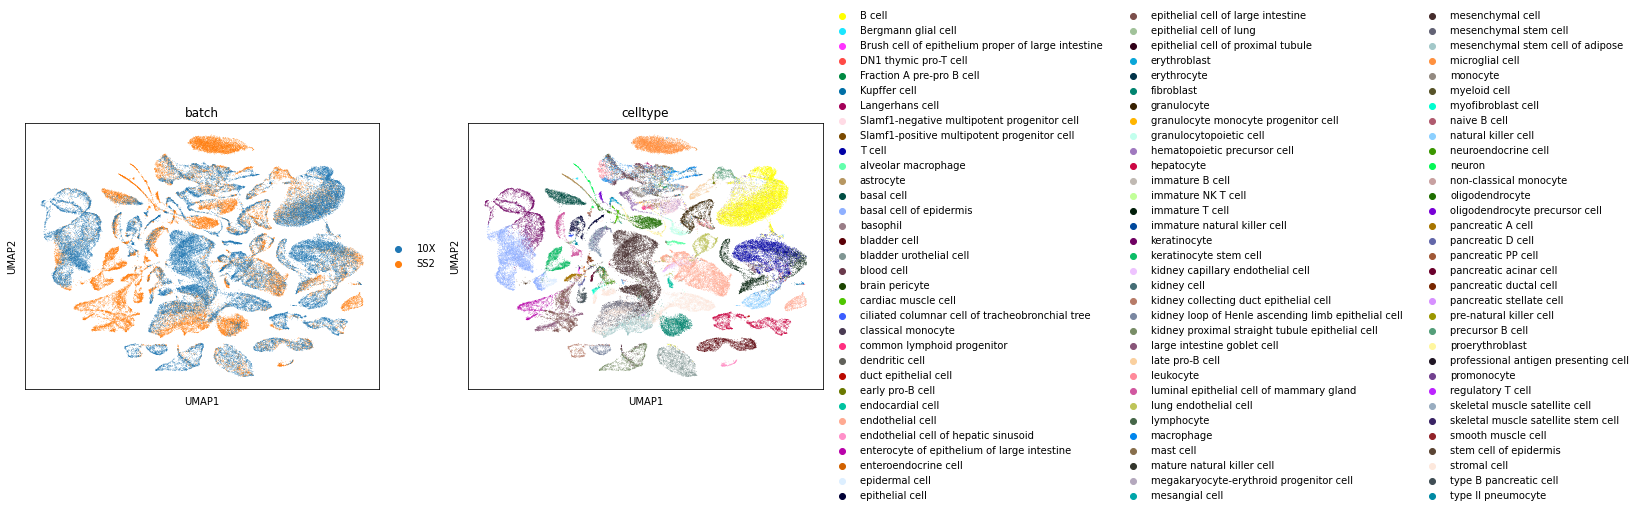

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])

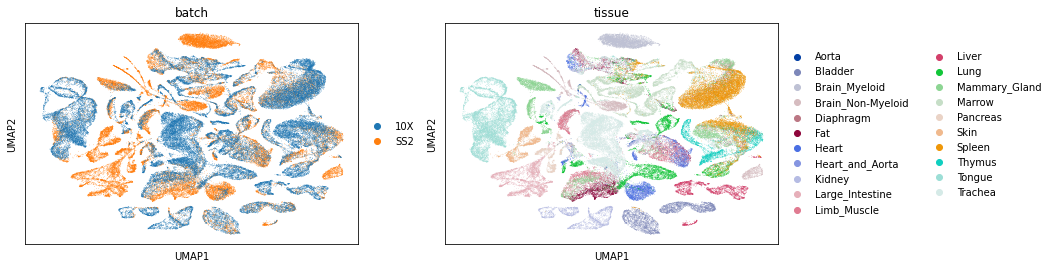

In [10]:
sc.pl.umap(model.integrated, color = ['batch', 'tissue'])